# Tarea 4. Midiendo rendimiento y riesgo en un portafolio.

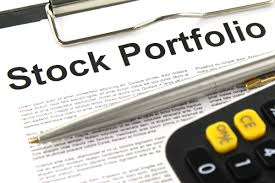

**Resumen.**
> En esta tarea, calcularás medidas de rendimiento esperado diario y volatilidad para cuatro diferentes portafolios. Usarás los históricos de precios que ya descargaste en la tarea anterior.

**Criterio de revisión.**
> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

**Antes de comenzar.**
> Por favor, copiar y pegar este archivo en otra ubicación. Antes de comenzar, nombrarlo *Tarea4_ApellidoNombre*, sin acentos y sin espacios; por ejemplo, en mi caso el archivo se llamaría *Tarea4_JimenezEsteban*. Resolver todos los puntos en dicho archivo y subir en este espacio.

## 1. Descarga de datos (20 puntos)

Descargar los precios diarios ajustados en el cierre para el índice S&P 500 (^GSPC), Microsoft (MSFT), Walgreens (WBA), y Tesla Motors (TSLA) durante el periodo comprendido del primero de enero del 2011 hasta el 31 de diciembre del 2015.

1. Mostrar el DataFrame de los precios diarios (5 puntos).
2. Graficar los precios (5 puntos).
3. Mostrar el DataFrame de los rendimientos porcentuales diarios (5 puntos).
4. Graficar los rendimientos (5 puntos).

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web

In [17]:
def get_closes(tickers, start_date=None, end_date=None, freq=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Frecuencia de muestreo por defecto (freq='d')
    # Importamos paquetes necesarios
    import pandas as pd
    pd.core.common.is_list_like = pd.api.types.is_list_like
    import pandas_datareader.data as web  
    # Creamos DataFrame vacío de precios, con el índice de las fechas
    closes = pd.DataFrame(columns = tickers, index=web.YahooDailyReader(symbols=tickers[0], start=start_date, end=end_date, interval=freq).read().index)
    # Agregamos cada uno de los precios con YahooDailyReader
    for ticker in tickers:
        df = web.YahooDailyReader(symbols=ticker, start=start_date, end=end_date, interval=freq).read()
        closes[ticker]=df['Adj Close']
    closes.index_name = 'Date'
    closes = closes.sort_index()
    return closes

In [18]:
ticker=['^GSPC','MSFT','WBA','TSLA']
start,end='2011-01-01','2015-12-31'
closes=get_closes(ticker,start,end,freq='d')
closes

,^GSPC,MSFT,WBA,TSLA
Date,,,,
2011-01-03,1271.869995,22.912699,33.120098,26.620001
2011-01-04,1270.199951,23.002779,33.398075,26.670000
2011-01-05,1276.560059,22.929071,33.861340,26.830000
2011-01-06,1273.849976,23.600565,33.962425,27.879999
2011-01-07,1271.500000,23.420408,33.760262,28.240000
2011-01-10,1269.750000,23.109228,34.493088,28.450001
2011-01-11,1274.479980,23.019156,34.392010,26.959999
2011-01-12,1285.959961,23.379471,34.703655,26.959999
2011-01-13,1283.760010,23.084660,35.074276,26.219999


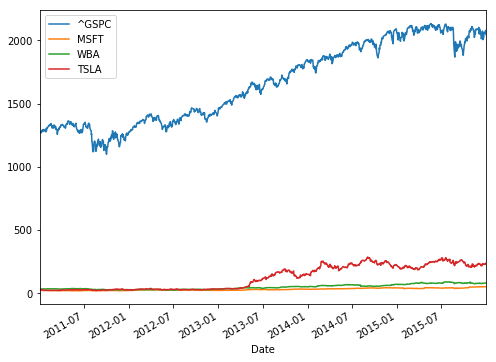

In [19]:
closes.plot(figsize=(8,6));

In [20]:
ret=closes.pct_change().dropna()
ret

,^GSPC,MSFT,WBA,TSLA
Date,,,,
2011-01-04,-0.001313,0.003931,0.008393,0.001878
2011-01-05,0.005007,-0.003204,0.013871,0.005999
2011-01-06,-0.002123,0.029286,0.002985,0.039135
2011-01-07,-0.001845,-0.007634,-0.005953,0.012913
2011-01-10,-0.001376,-0.013287,0.021707,0.007436
2011-01-11,0.003725,-0.003898,-0.002930,-0.052373
2011-01-12,0.009008,0.015653,0.009062,0.000000
2011-01-13,-0.001711,-0.012610,0.010680,-0.027448
2011-01-14,0.007385,0.003902,-0.004803,-0.017925


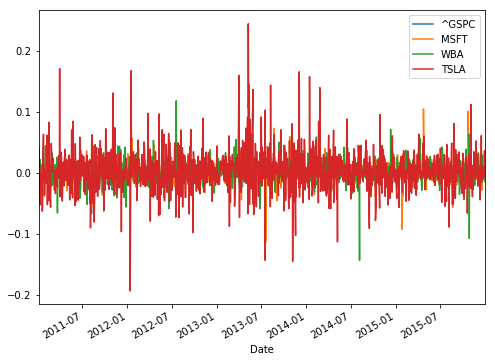

In [21]:
ret.plot(figsize=(8,6));

## 2. Rendimiento esperado y volatilidad para cada activo (30 puntos)

Usando los datos de rendimientos diarios de MSFT, WBA, y TSLA:

1. Reportar en un DataFrame el rendimiento esperado diario y la volatilidad diaria para cada activo. Reportar en otro DataFrame el rendimiento esperado anual y la volatilidad anual para cada activo (10 puntos).
2. Calcular la matriz de varianza-covarianza (base diaria) para los activos MSFT, WBA, y TSLA (10 puntos).
3. Calcular la matriz de correlación (base diaria) para los activos MSFT, WBA, y TSLA (10 puntos).

In [22]:
ret2 = ret[['MSFT', 'WBA', 'TSLA']]
#el rendimiento esperado diario y la volatilidad diaria para cada activo
ret_sum=pd.DataFrame(index=['Mean','Volatility'],columns=ret2.columns)
ret_sum.loc['Mean']=ret2.mean()
ret_sum.loc['Volatility']=ret2.std()
ret_sum

,MSFT,WBA,TSLA
Mean,0.000763744,0.00083927,0.00229583
Volatility,0.0147987,0.0162465,0.0332456


In [23]:
#rendimiento esperado anual y la volatilidad anual para cada activo
an_ret_sum=pd.DataFrame(index=['Mean','Volatility'],columns=ret2.columns)
an_ret_sum.loc['Mean']=ret2.mean()*252
an_ret_sum.loc['Volatility']=ret2.std()*np.sqrt(252)
an_ret_sum

,MSFT,WBA,TSLA
Mean,0.192464,0.211496,0.578548
Volatility,0.234923,0.257905,0.527757


In [24]:
cov=ret2.cov()
cov

,MSFT,WBA,TSLA
MSFT,0.000219,0.000072,0.000120
WBA,0.000072,0.000264,0.000083
TSLA,0.000120,0.000083,0.001105


In [25]:
corr=ret2.corr()
corr

,MSFT,WBA,TSLA
MSFT,1.000000,0.298437,0.243817
WBA,0.298437,1.000000,0.153495
TSLA,0.243817,0.153495,1.000000


## 3. Rentimiento esperado y volatilidad para portafolios (30 puntos)

1. Calcular los rendimientos diarios de los siguientes portafolios. Reportar en un DataFrame el rendimiento esperado anual y la volatilidad anual para cada portafolio, calculando lo anterior tratando cada portafolio como si fuera un activo individual (15 puntos).
 - Portafolio 1: igualmente ponderado entre MSFT, WBA, y TSLA.
 - Portafolio 2: 30% MSFT, 20% WBA, y 50% TSLA.
 - Portafolio 3: 50% MSFT, 30% WBA, y 20% TSLA.
 - Portafolio 4: 20% MSFT, 50% WBA, y 30% TSLA.
2. Para cada uno de los anteriores portafolios, reportar en otro DataFrame el rendimiento esperado anual y la volatilidad anual para cada portafolio, calculando lo anterior mediante las fórmulas de rendimiento esperado y volatilidad para portafolios derivadas en clase (10 puntos).
3. Comparar los resultados del punto uno con los del punto dos (5 puntos).

In [39]:
wP1 = np.array([1/3,1/3,1/3])
wP2 = np.array([0.3,0.2,0.5])
wP3 = np.array([0.5,0.3,0.2])
wP4 = np.array([0.2,0.5,0.3])
W = np.array([wP1, wP2, wP3, wP4]).T
W

array([[ 0.33333333,  0.3       ,  0.5       ,  0.2       ],
       [ 0.33333333,  0.2       ,  0.3       ,  0.5       ],
       [ 0.33333333,  0.5       ,  0.2       ,  0.3       ]])

In [27]:
ret_portafolios = (pd.DataFrame(data=ret2.dot(W).values,columns=['P1', 'P2', 'P3', 'P4'], index = ret2.index))
ret_portafolios

,P1,P2,P3,P4
Date,,,,
2011-01-04,0.004734,0.003797,0.004859,0.005546
2011-01-05,0.005555,0.004813,0.003759,0.008094
2011-01-06,0.023802,0.028950,0.023365,0.019090
2011-01-07,-0.000225,0.002976,-0.003020,-0.000629
2011-01-10,0.005285,0.004073,0.001356,0.010427
2011-01-11,-0.019734,-0.027942,-0.013302,-0.017957
2011-01-12,0.008238,0.006508,0.010545,0.007661
2011-01-13,-0.009793,-0.015371,-0.008591,-0.005417
2011-01-14,-0.006276,-0.008753,-0.003075,-0.006999


In [36]:
an_ret_port_sum=pd.DataFrame(index=['Mean','Volatility'], columns=ret_portafolios.columns)
an_ret_port_sum.loc['Mean']=ret_portafolios.mean()*252
an_ret_port_sum.loc['Volatility']=ret_portafolios.std()*np.sqrt(252)
an_ret_port_sum

,P1,P2,P3,P4
Mean,0.327503,0.389312,0.27539,0.317805
Volatility,0.24464,0.304428,0.211901,0.239615


In [37]:
Eport = an_ret_sum.loc['Mean'].dot(W)
Eport

Exception: Dot product shape mismatch, (4,) vs (3, 4)

las esperanzas anuales son iguales por formula que por la tabla

In [31]:
stdPort1=np.sqrt(252*wP1.T.dot(cov).dot(wP1))
stdPort2=np.sqrt(252*wP2.T.dot(cov).dot(wP2))
stdPort3=np.sqrt(252*wP3.T.dot(cov).dot(wP3))
stdPort4=np.sqrt(252*wP4.T.dot(cov).dot(wP4))
stdPort1,stdPort2,stdPort3,stdPort4

(0.24463972256421943,
 0.30442812676024089,
 0.21190088114433506,
 0.23961491629792411)

las volatilidades anuales son iguales por formula que por la tabla

## 4. Gráfico de rendimientos esperados vs. volatilidad (20 puntos)

Crear un gráfico de puntos que muestre el rendimiento esperado y la volatilidad para cada uno de los activos, el índice S&P500, y los cuatro portafolios en el espacio rendimiento esperado (eje y) contra volatilidad (eje x). Etiquetar cada uno de los puntos y los ejes apropiadamente.

In [32]:
#rendimiento esperado anual y la volatilidad anual para cada activo
an_ret_sum=pd.DataFrame(index=['Mean','Volatility'],columns=ret.columns)
an_ret_sum.loc['Mean']=ret.mean()*252
an_ret_sum.loc['Volatility']=ret.std()*np.sqrt(252)
TODO=an_ret_sum.join(an_ret_port_sum)

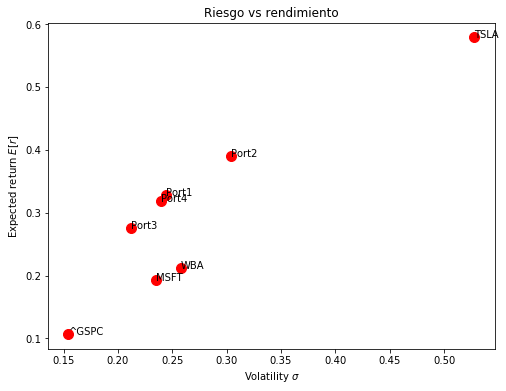

      fun: 0.024185330902569656
 hess_inv: array([[ 0.48646384, -1.5588685 ],
       [-1.5588685 ,  5.7317884 ]])
      jac: array([  0.00000000e+00,   3.49245965e-09])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([-0.01859494,  1.17125929])

In [33]:
x=TODO.loc['Volatility'].values
y=TODO.loc['Mean'].values
plt.figure(figsize=(8,6))
plt.plot(x,y,'ro',ms=10)
plt.xlabel('Volatility $\sigma$')
plt.ylabel('Expected return $E[r]$')
plt.title('Riesgo vs rendimiento')
plt.text(x[0],y[0],ticker[0])
plt.text(x[1],y[1],ticker[1])
plt.text(x[2],y[2],ticker[2])
plt.text(x[3],y[3],ticker[3])
plt.text(x[4],y[4],'Port1')
plt.text(x[5],y[5],'Port2')
plt.text(x[6],y[6],'Port3')
plt.text(x[7],y[7],'Port4')
plt.show()
import scipy.optimize as opt
def fun_obj(b,x,y):
    return np.sum((y-b[0]-b[1]*x)**2)
b0=[0,0]
res=opt.minimize(fun_obj, b0,args=(x,y))
res

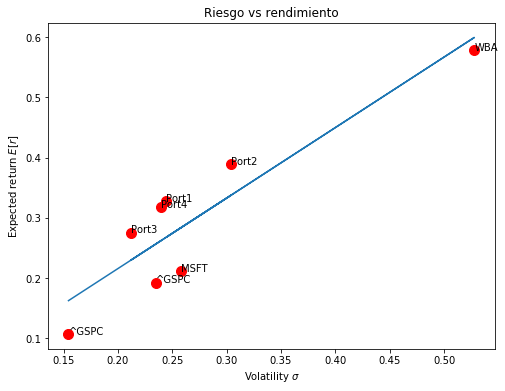

In [34]:
x=TODO.loc['Volatility'].values
y=TODO.loc['Mean'].values
plt.figure(figsize=(8,6))
plt.plot(x,y,'ro',ms=10)
plt.xlabel('Volatility $\sigma$')
plt.ylabel('Expected return $E[r]$')
plt.title('Riesgo vs rendimiento')
plt.text(x[0],y[0],'^GSPC')
plt.text(x[1],y[1],ticker[0])
plt.text(x[2],y[2],ticker[1])
plt.text(x[3],y[3],ticker[2])
plt.text(x[4],y[4],'Port1')
plt.text(x[5],y[5],'Port2')
plt.text(x[6],y[6],'Port3')
plt.text(x[7],y[7],'Port4')
plt.plot(x,res.x[0]+res.x[1]*x)

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>